In [1]:
library(Signac)
library(Seurat)
library(future.apply)
library(stringr)
library(AnnotationHub)
library(GenomicRanges)
library(tidyr)
library(ggplot2)
library(JASPAR2020)
library(TFBSTools)
library(motifmatchr)
library(BSgenome.Hsapiens.UCSC.hg38)

载入需要的程序包：SeuratObject

载入需要的程序包：sp


载入程序包：‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


载入需要的程序包：future

载入需要的程序包：BiocGenerics


载入程序包：‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


载入需要的程序包：BiocFileCache

载入需要的程序包：dbplyr

载入需要的程序包：stats4

载入需要的程序包：S4Vectors


载入程序包：‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The foll

In [ ]:
#choose the celltype 

In [2]:
seurat <- readRDS('/media/AnalysisDisk1/xuzekai/20250715_BMI/ATAC/seurat/cMono_CD14.rds')

genome <- BSgenome.Hsapiens.UCSC.hg38
seqinfo <- seqinfo(genome)
meta_data<-seurat@meta.data
counts_matrix <- GetAssayData(seurat, slot = "counts")
new_rownames <- gsub(":", "-", rownames(counts_matrix))

# 更新矩阵的行名
rownames(counts_matrix) <- new_rownames

# 查看结果
head(rownames(counts_matrix))

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


[1] "chr1-9928-10429"    "chr1-29162-29663"   "chr1-94644-95145"  
[4] "chr1-96339-96840"   "chr1-103936-104437" "chr1-115481-115982"

In [3]:
genome <- BSgenome.Hsapiens.UCSC.hg38
seqinfo <- seqinfo(genome)

files <- list.files(
  path = "/media/AnalysisDisk1/xuzekai/20250715_BMI/ATAC/fragment/cMono_CD14/",
  pattern = "fragments\\.filtered\\.tsv\\.gz$",
  full.names = TRUE
)

fragment_objects <- lapply(files, function(file_path) {
  # 提取文件名（不含路径）
  fname <- basename(file_path)
  
  # 提取第一个 . 之前的部分作为样本名（library 名）
  sample_name <- tools::file_path_sans_ext(fname)  # 去掉 .tsv.gz → "CIMA_ATAC_H002_2.fragments.filtered"
  sample_name <- sub("\\..*", "", sample_name)     # 去掉第一个 . 及之后内容 → "CIMA_ATAC_H002_2"
  print(sample_name)
  # 从 meta_data 中获取该 library 对应的细胞条形码
  cells_to_keep <- rownames(meta_data[meta_data['library']==sample_name,])
  
  # 如果没有匹配的细胞，给出警告
  if (length(cells_to_keep) == 0) {
    warning("No cells found for library: ", sample_name, " in file: ", file_path)
    return(NULL)
  }
  
  # 创建 FragmentObject，只加载指定细胞
  frag_obj <- CreateFragmentObject(
    path = file_path,
    cells = cells_to_keep
  )
  
  message("Loaded ", length(frag_obj), " cells for ", sample_name)
  return(frag_obj)
})

[1] "CIMA_ATAC_H001_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H001_1



[1] "CIMA_ATAC_H001_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H001_2



[1] "CIMA_ATAC_H002_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H002_1



[1] "CIMA_ATAC_H002_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H002_2



[1] "CIMA_ATAC_H005_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H005_1



[1] "CIMA_ATAC_H005_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H005_2



[1] "CIMA_ATAC_H006_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H006_1



[1] "CIMA_ATAC_H006_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H006_2



[1] "CIMA_ATAC_H007_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H007_1



[1] "CIMA_ATAC_H007_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H007_2



[1] "CIMA_ATAC_H008_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H008_1



[1] "CIMA_ATAC_H008_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H008_2



[1] "CIMA_ATAC_H009_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H009_1



[1] "CIMA_ATAC_H009_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H009_2



[1] "CIMA_ATAC_H017_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H017_1



[1] "CIMA_ATAC_H017_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H017_2



[1] "CIMA_ATAC_H022_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H022_1



[1] "CIMA_ATAC_H022_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H022_2



[1] "CIMA_ATAC_H037_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H037_1



[1] "CIMA_ATAC_H037_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H037_2



[1] "CIMA_ATAC_H038_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H038_1



[1] "CIMA_ATAC_H038_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H038_2



[1] "CIMA_ATAC_H042_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H042_1



[1] "CIMA_ATAC_H042_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H042_2



[1] "CIMA_ATAC_H044_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H044_1



[1] "CIMA_ATAC_H044_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H044_2



[1] "CIMA_ATAC_H046_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H046_1



[1] "CIMA_ATAC_H046_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H046_2



[1] "CIMA_ATAC_H048_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H048_1



[1] "CIMA_ATAC_H048_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H048_2



[1] "CIMA_ATAC_H050_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H050_1



[1] "CIMA_ATAC_H050_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H050_2



[1] "CIMA_ATAC_H057_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H057_1



[1] "CIMA_ATAC_H057_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H057_2



[1] "CIMA_ATAC_H059_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H059_1



[1] "CIMA_ATAC_H059_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H059_2



[1] "CIMA_ATAC_H060_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H060_1



[1] "CIMA_ATAC_H060_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H060_2



[1] "CIMA_ATAC_H061_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H061_1



[1] "CIMA_ATAC_H061_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H061_2



[1] "CIMA_ATAC_H062_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H062_1



[1] "CIMA_ATAC_H062_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H062_2



[1] "CIMA_ATAC_H072_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H072_1



[1] "CIMA_ATAC_H072_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H072_2



[1] "CIMA_ATAC_H074_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H074_1



[1] "CIMA_ATAC_H074_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H074_2



[1] "CIMA_ATAC_H075_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H075_1



[1] "CIMA_ATAC_H075_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H075_2



[1] "CIMA_ATAC_H076_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H076_1



[1] "CIMA_ATAC_H076_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H076_2



[1] "CIMA_ATAC_H077_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H077_1



[1] "CIMA_ATAC_H077_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H077_2



[1] "CIMA_ATAC_H078_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H078_1



[1] "CIMA_ATAC_H078_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H078_2



[1] "CIMA_ATAC_H079_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H079_1



[1] "CIMA_ATAC_H079_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H079_2



[1] "CIMA_ATAC_H080_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H080_1



[1] "CIMA_ATAC_H080_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H080_2



[1] "CIMA_ATAC_H081_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H081_1



[1] "CIMA_ATAC_H081_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H081_2



[1] "CIMA_ATAC_H082_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H082_1



[1] "CIMA_ATAC_H082_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H082_2



[1] "CIMA_ATAC_H083_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H083_1



[1] "CIMA_ATAC_H083_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H083_2



[1] "CIMA_ATAC_H084_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H084_1



[1] "CIMA_ATAC_H084_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H084_2



[1] "CIMA_ATAC_H086_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H086_1



[1] "CIMA_ATAC_H086_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H086_2



[1] "CIMA_ATAC_H087_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H087_1



[1] "CIMA_ATAC_H087_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H087_2



[1] "CIMA_ATAC_H088_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H088_1



[1] "CIMA_ATAC_H088_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H088_2



[1] "CIMA_ATAC_H089_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H089_1



[1] "CIMA_ATAC_H089_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H089_2



[1] "CIMA_ATAC_H094_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H094_1



[1] "CIMA_ATAC_H094_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H094_2



[1] "CIMA_ATAC_H098_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H098_1



[1] "CIMA_ATAC_H098_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H098_2



[1] "CIMA_ATAC_H099_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H099_1



[1] "CIMA_ATAC_H099_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H099_2



[1] "CIMA_ATAC_H100_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H100_1



[1] "CIMA_ATAC_H100_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H100_2



[1] "CIMA_ATAC_H102_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H102_1



[1] "CIMA_ATAC_H102_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H102_2



[1] "CIMA_ATAC_H103_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H103_1



[1] "CIMA_ATAC_H103_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H103_2



[1] "CIMA_ATAC_H105_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H105_1



[1] "CIMA_ATAC_H105_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H105_2



[1] "CIMA_ATAC_H107_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H107_2



[1] "CIMA_ATAC_H109_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H109_1



[1] "CIMA_ATAC_H109_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H109_2



[1] "CIMA_ATAC_H112_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H112_1



[1] "CIMA_ATAC_H112_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H112_2



[1] "CIMA_ATAC_H116_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H116_1



[1] "CIMA_ATAC_H116_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H116_2



[1] "CIMA_ATAC_H117_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H117_1



[1] "CIMA_ATAC_H117_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H117_2



[1] "CIMA_ATAC_H118_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H118_1



[1] "CIMA_ATAC_H118_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H118_2



[1] "CIMA_ATAC_H121_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H121_1



[1] "CIMA_ATAC_H121_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H121_2



[1] "CIMA_ATAC_H123_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H123_1



[1] "CIMA_ATAC_H123_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H123_2



[1] "CIMA_ATAC_H125_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H125_1



[1] "CIMA_ATAC_H125_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H125_2



[1] "CIMA_ATAC_H126_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H126_1



[1] "CIMA_ATAC_H126_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H126_2



[1] "CIMA_ATAC_H128_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H128_1



[1] "CIMA_ATAC_H128_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H128_2



[1] "CIMA_ATAC_H129_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H129_1



[1] "CIMA_ATAC_H129_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H129_2



[1] "CIMA_ATAC_H130_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H130_1



[1] "CIMA_ATAC_H130_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H130_2



[1] "CIMA_ATAC_H133_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H133_1



[1] "CIMA_ATAC_H133_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H133_2



[1] "CIMA_ATAC_H134_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H134_1



[1] "CIMA_ATAC_H134_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H134_2



[1] "CIMA_ATAC_H135_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H135_1



[1] "CIMA_ATAC_H135_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H135_2



[1] "CIMA_ATAC_H138_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H138_1



[1] "CIMA_ATAC_H138_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H138_2



[1] "CIMA_ATAC_H139_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H139_1



[1] "CIMA_ATAC_H139_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H139_2



[1] "CIMA_ATAC_H141_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H141_1



[1] "CIMA_ATAC_H141_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H141_2



[1] "CIMA_ATAC_H142_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H142_1



[1] "CIMA_ATAC_H142_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H142_2



[1] "CIMA_ATAC_H144_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H144_1



[1] "CIMA_ATAC_H144_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H144_2



[1] "CIMA_ATAC_H145_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H145_1



[1] "CIMA_ATAC_H145_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H145_2



[1] "CIMA_ATAC_H148_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H148_1



[1] "CIMA_ATAC_H148_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H148_2



[1] "CIMA_ATAC_H149_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H149_1



[1] "CIMA_ATAC_H149_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H149_2



[1] "CIMA_ATAC_H150_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H150_1



[1] "CIMA_ATAC_H150_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H150_2



[1] "CIMA_ATAC_H153_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H153_1



[1] "CIMA_ATAC_H153_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H153_2



[1] "CIMA_ATAC_H154_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H154_1



[1] "CIMA_ATAC_H154_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H154_2



[1] "CIMA_ATAC_H162_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H162_1



[1] "CIMA_ATAC_H162_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H162_2



[1] "CIMA_ATAC_H166_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H166_1



[1] "CIMA_ATAC_H166_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H166_2



[1] "CIMA_ATAC_H168_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H168_1



[1] "CIMA_ATAC_H168_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H168_2



[1] "CIMA_ATAC_H172_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H172_1



[1] "CIMA_ATAC_H172_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H172_2



[1] "CIMA_ATAC_H173_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H173_1



[1] "CIMA_ATAC_H173_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H173_2



[1] "CIMA_ATAC_H174_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H174_1



[1] "CIMA_ATAC_H174_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H174_2



[1] "CIMA_ATAC_H175_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H175_1



[1] "CIMA_ATAC_H175_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H175_2



[1] "CIMA_ATAC_H176_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H176_1



[1] "CIMA_ATAC_H176_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H176_2



[1] "CIMA_ATAC_H177_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H177_1



[1] "CIMA_ATAC_H177_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H177_2



[1] "CIMA_ATAC_H178_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H178_1



[1] "CIMA_ATAC_H178_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H178_2



[1] "CIMA_ATAC_H179_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H179_1



[1] "CIMA_ATAC_H179_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H179_2



[1] "CIMA_ATAC_H181_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H181_1



[1] "CIMA_ATAC_H181_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H181_2



[1] "CIMA_ATAC_H185_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H185_1



[1] "CIMA_ATAC_H185_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H185_2



[1] "CIMA_ATAC_H186_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H186_1



[1] "CIMA_ATAC_H186_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H186_2



[1] "CIMA_ATAC_H187_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H187_1



[1] "CIMA_ATAC_H187_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H187_2



[1] "CIMA_ATAC_H188_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H188_1



[1] "CIMA_ATAC_H188_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H188_2



[1] "CIMA_ATAC_H192_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H192_1



[1] "CIMA_ATAC_H192_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H192_2



[1] "CIMA_ATAC_H193_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H193_1



[1] "CIMA_ATAC_H193_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H193_2



[1] "CIMA_ATAC_H196_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H196_1



[1] "CIMA_ATAC_H196_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H196_2



[1] "CIMA_ATAC_H197_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H197_1



[1] "CIMA_ATAC_H197_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H197_2



[1] "CIMA_ATAC_H198_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H198_1



[1] "CIMA_ATAC_H198_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H198_2



[1] "CIMA_ATAC_H202_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H202_1



[1] "CIMA_ATAC_H202_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H202_2



[1] "CIMA_ATAC_H203_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H203_1



[1] "CIMA_ATAC_H203_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H203_2



[1] "CIMA_ATAC_H204_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H204_1



[1] "CIMA_ATAC_H204_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H204_2



[1] "CIMA_ATAC_H205_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H205_1



[1] "CIMA_ATAC_H205_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H205_2



[1] "CIMA_ATAC_H206_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H206_1



[1] "CIMA_ATAC_H206_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H206_2



[1] "CIMA_ATAC_H207_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H207_1



[1] "CIMA_ATAC_H207_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H207_2



[1] "CIMA_ATAC_H208_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H208_1



[1] "CIMA_ATAC_H208_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H208_2



[1] "CIMA_ATAC_H209_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H209_1



[1] "CIMA_ATAC_H209_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H209_2



[1] "CIMA_ATAC_H210_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H210_1



[1] "CIMA_ATAC_H210_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H210_2



[1] "CIMA_ATAC_H211_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H211_1



[1] "CIMA_ATAC_H211_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H211_2



[1] "CIMA_ATAC_H212_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H212_1



[1] "CIMA_ATAC_H212_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H212_2



[1] "CIMA_ATAC_H213_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H213_1



[1] "CIMA_ATAC_H213_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H213_2



[1] "CIMA_ATAC_H215_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H215_1



[1] "CIMA_ATAC_H215_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H215_2



[1] "CIMA_ATAC_H216_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H216_1



[1] "CIMA_ATAC_H216_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H216_2



[1] "CIMA_ATAC_H217_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H217_1



[1] "CIMA_ATAC_H217_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H217_2



[1] "CIMA_ATAC_H219_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H219_1



[1] "CIMA_ATAC_H219_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H219_2



[1] "CIMA_ATAC_H222_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H222_1



[1] "CIMA_ATAC_H222_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H222_2



[1] "CIMA_ATAC_H223_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H223_1



[1] "CIMA_ATAC_H223_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H223_2



[1] "CIMA_ATAC_H224_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H224_1



[1] "CIMA_ATAC_H224_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H224_2



[1] "CIMA_ATAC_H225_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H225_1



[1] "CIMA_ATAC_H225_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H225_2



[1] "CIMA_ATAC_H226_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H226_1



[1] "CIMA_ATAC_H226_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H226_2



[1] "CIMA_ATAC_H227_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H227_1



[1] "CIMA_ATAC_H227_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H227_2



[1] "CIMA_ATAC_H231_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H231_1



[1] "CIMA_ATAC_H231_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H231_2



[1] "CIMA_ATAC_H233_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H233_1



[1] "CIMA_ATAC_H233_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H233_2



[1] "CIMA_ATAC_H234_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H234_1



[1] "CIMA_ATAC_H234_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H234_2



[1] "CIMA_ATAC_H235_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H235_1



[1] "CIMA_ATAC_H235_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H235_2



[1] "CIMA_ATAC_H236_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H236_1



[1] "CIMA_ATAC_H236_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H236_2



[1] "CIMA_ATAC_H237_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H237_1



[1] "CIMA_ATAC_H237_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H237_2



[1] "CIMA_ATAC_H238_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H238_1



[1] "CIMA_ATAC_H238_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H238_2



[1] "CIMA_ATAC_H239_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H239_1



[1] "CIMA_ATAC_H239_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H239_2



[1] "CIMA_ATAC_H241_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H241_1



[1] "CIMA_ATAC_H241_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H241_2



[1] "CIMA_ATAC_H243_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H243_1



[1] "CIMA_ATAC_H243_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H243_2



[1] "CIMA_ATAC_H244_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H244_1



[1] "CIMA_ATAC_H244_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H244_2



[1] "CIMA_ATAC_H246_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H246_1



[1] "CIMA_ATAC_H246_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H246_2



[1] "CIMA_ATAC_H247_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H247_1



[1] "CIMA_ATAC_H247_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H247_2



[1] "CIMA_ATAC_H249_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H249_1



[1] "CIMA_ATAC_H249_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H249_2



[1] "CIMA_ATAC_H250_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H250_1



[1] "CIMA_ATAC_H250_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H250_2



[1] "CIMA_ATAC_H258_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H258_1



[1] "CIMA_ATAC_H258_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H258_2



[1] "CIMA_ATAC_H259_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H259_1



[1] "CIMA_ATAC_H259_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H259_2



[1] "CIMA_ATAC_H260_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H260_1



[1] "CIMA_ATAC_H260_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H260_2



[1] "CIMA_ATAC_H261_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H261_1



[1] "CIMA_ATAC_H261_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H261_2



[1] "CIMA_ATAC_H262_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H262_1



[1] "CIMA_ATAC_H262_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H262_2



[1] "CIMA_ATAC_H263_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H263_1



[1] "CIMA_ATAC_H263_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H263_2



[1] "CIMA_ATAC_H264_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H264_1



[1] "CIMA_ATAC_H264_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H264_2



[1] "CIMA_ATAC_H265_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H265_1



[1] "CIMA_ATAC_H265_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H265_2



[1] "CIMA_ATAC_H266_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H266_1



[1] "CIMA_ATAC_H266_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H266_2



[1] "CIMA_ATAC_H267_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H267_1



[1] "CIMA_ATAC_H267_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H267_2



[1] "CIMA_ATAC_H268_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H268_1



[1] "CIMA_ATAC_H268_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H268_2



[1] "CIMA_ATAC_H269_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H269_1



[1] "CIMA_ATAC_H269_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H269_2



[1] "CIMA_ATAC_H270_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H270_1



[1] "CIMA_ATAC_H270_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H270_2



[1] "CIMA_ATAC_H271_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H271_1



[1] "CIMA_ATAC_H271_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H271_2



[1] "CIMA_ATAC_H272_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H272_1



[1] "CIMA_ATAC_H272_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H272_2



[1] "CIMA_ATAC_H273_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H273_1



[1] "CIMA_ATAC_H273_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H273_2



[1] "CIMA_ATAC_H274_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H274_1



[1] "CIMA_ATAC_H274_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H274_2



[1] "CIMA_ATAC_H276_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H276_1



[1] "CIMA_ATAC_H276_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H276_2



[1] "CIMA_ATAC_H277_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H277_1



[1] "CIMA_ATAC_H277_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H277_2



[1] "CIMA_ATAC_H278_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H278_1



[1] "CIMA_ATAC_H278_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H278_2



[1] "CIMA_ATAC_H279_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H279_1



[1] "CIMA_ATAC_H279_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H279_2



[1] "CIMA_ATAC_H280_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H280_1



[1] "CIMA_ATAC_H280_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H280_2



[1] "CIMA_ATAC_H281_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H281_1



[1] "CIMA_ATAC_H281_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H281_2



[1] "CIMA_ATAC_H283_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H283_1



[1] "CIMA_ATAC_H283_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H283_2



[1] "CIMA_ATAC_H288_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H288_1



[1] "CIMA_ATAC_H288_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H288_2



[1] "CIMA_ATAC_H293_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H293_1



[1] "CIMA_ATAC_H293_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H293_2



[1] "CIMA_ATAC_H294_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H294_1



[1] "CIMA_ATAC_H294_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H294_2



[1] "CIMA_ATAC_H298_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H298_1



[1] "CIMA_ATAC_H298_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H298_2



[1] "CIMA_ATAC_H301_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H301_1



[1] "CIMA_ATAC_H301_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H301_2



[1] "CIMA_ATAC_H302_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H302_1



[1] "CIMA_ATAC_H302_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H302_2



[1] "CIMA_ATAC_H303_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H303_1



[1] "CIMA_ATAC_H303_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H303_2



[1] "CIMA_ATAC_H304_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H304_1



[1] "CIMA_ATAC_H304_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H304_2



[1] "CIMA_ATAC_H305_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H305_1



[1] "CIMA_ATAC_H305_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H305_2



[1] "CIMA_ATAC_H306_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H306_1



[1] "CIMA_ATAC_H306_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H306_2



[1] "CIMA_ATAC_H308_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H308_1



[1] "CIMA_ATAC_H308_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H308_2



[1] "CIMA_ATAC_H309_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H309_1



[1] "CIMA_ATAC_H309_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H309_2



[1] "CIMA_ATAC_H310_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H310_1



[1] "CIMA_ATAC_H310_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H310_2



[1] "CIMA_ATAC_H311_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H311_1



[1] "CIMA_ATAC_H311_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H311_2



[1] "CIMA_ATAC_H312_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H312_1



[1] "CIMA_ATAC_H312_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H312_2



[1] "CIMA_ATAC_H313_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H313_1



[1] "CIMA_ATAC_H313_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H313_2



[1] "CIMA_ATAC_H316_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H316_1



[1] "CIMA_ATAC_H316_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H316_2



[1] "CIMA_ATAC_H317_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H317_1



[1] "CIMA_ATAC_H317_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H317_2



[1] "CIMA_ATAC_H318_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H318_1



[1] "CIMA_ATAC_H318_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H318_2



[1] "CIMA_ATAC_H320_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H320_1



[1] "CIMA_ATAC_H320_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H320_2



[1] "CIMA_ATAC_H322_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H322_1



[1] "CIMA_ATAC_H322_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H322_2



[1] "CIMA_ATAC_H324_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H324_1



[1] "CIMA_ATAC_H324_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H324_2



[1] "CIMA_ATAC_H326_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H326_1



[1] "CIMA_ATAC_H326_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H326_2



[1] "CIMA_ATAC_H329_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H329_1



[1] "CIMA_ATAC_H329_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H329_2



[1] "CIMA_ATAC_H330_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H330_1



[1] "CIMA_ATAC_H330_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H330_2



[1] "CIMA_ATAC_H332_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H332_1



[1] "CIMA_ATAC_H332_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H332_2



[1] "CIMA_ATAC_H333_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H333_1



[1] "CIMA_ATAC_H333_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H333_2



[1] "CIMA_ATAC_H335_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H335_1



[1] "CIMA_ATAC_H335_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H335_2



[1] "CIMA_ATAC_H338_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H338_1



[1] "CIMA_ATAC_H338_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H338_2



[1] "CIMA_ATAC_H339_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H339_1



[1] "CIMA_ATAC_H339_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H339_2



[1] "CIMA_ATAC_H340_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H340_1



[1] "CIMA_ATAC_H340_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H340_2



[1] "CIMA_ATAC_H341_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H341_1



[1] "CIMA_ATAC_H341_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H341_2



[1] "CIMA_ATAC_H342_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H342_1



[1] "CIMA_ATAC_H342_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H342_2



[1] "CIMA_ATAC_H343_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H343_1



[1] "CIMA_ATAC_H343_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H343_2



[1] "CIMA_ATAC_H344_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H344_1



[1] "CIMA_ATAC_H344_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H344_2



[1] "CIMA_ATAC_H350_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H350_1



[1] "CIMA_ATAC_H350_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H350_2



[1] "CIMA_ATAC_H352_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H352_1



[1] "CIMA_ATAC_H352_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H352_2



[1] "CIMA_ATAC_H354_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H354_1



[1] "CIMA_ATAC_H354_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H354_2



[1] "CIMA_ATAC_H359_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H359_1



[1] "CIMA_ATAC_H359_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H359_2



[1] "CIMA_ATAC_H360_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H360_1



[1] "CIMA_ATAC_H360_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H360_2



[1] "CIMA_ATAC_H361_1"


Computing hash

Loaded 1 cells for CIMA_ATAC_H361_1



[1] "CIMA_ATAC_H361_2"


Computing hash

Loaded 1 cells for CIMA_ATAC_H361_2



In [4]:
chrom_assay <- CreateChromatinAssay(
  counts = counts_matrix,
  sep = c("-","-"),
  genome = seqinfo,
  fragments = fragment_objects)

pbmc <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = meta_data
)

Warning message in CreateChromatinAssay(counts = counts_matrix, sep = c("-", "-"), :
“Overlapping ranges supplied. Ranges should be non-overlapping.”


In [5]:
ah <- AnnotationHub()
query(ah, "EnsDb.Hsapiens.v98")

ensdb_v98 <- ah[["AH75011"]]
annotations <- GetGRangesFromEnsDb(ensdb = ensdb_v98)
seqlevels(annotations)

AnnotationHub with 1 record
# snapshotDate(): 2024-10-28
# names(): AH75011
# $dataprovider: Ensembl
# $species: Homo sapiens
# $rdataclass: EnsDb
# $rdatadateadded: 2019-05-02
# $title: Ensembl 98 EnsDb for Homo sapiens
# $description: Gene and protein annotations for Homo sapiens based on Ensem...
# $taxonomyid: 9606
# $genome: GRCh38
# $sourcetype: ensembl
# $sourceurl: http://www.ensembl.org
# $sourcesize: NA
# $tags: c("98", "AHEnsDbs", "Annotation", "EnsDb", "Ensembl", "Gene",
#   "Protein", "Transcript") 
# retrieve record with 'object[["AH75011"]]' 

loading from cache

require(“ensembldb”)

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressW

[1] "X"  "20" "1"  "6"  "3"  "7"  "12" "11" "4"  "17" "2"  "16" "8"  "19" "9" 
[16] "13" "14" "5"  "22" "10" "Y"  "18" "15" "21" "MT"

In [6]:
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "hg38"
Annotation(pbmc) <- annotations

In [7]:
pwm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(species = 9606, all =FALSE ,factorType = "PFM")#似乎需要修改
)

name = sapply(pwm, function(x) x@name)

metadata <- data.frame(
  jaspar_id = names(pwm),           # MA0030.1, MA0031.1  
  name = sapply(pwm, function(x) x@name),            # MAF, MYC
  stringsAsFactors = FALSE
)

# 去重（因为 MA0030.1 和 MA0030.2 都对应 MA0030）
unique_mapping <- unique(metadata[c("jaspar_id", "name")])

unique_mapping%>%subset(name=='Tcf12')

jaspar_id,name
<chr>,<chr>


In [8]:
unique_mapping

,jaspar_id,name
,<chr>,<chr>
MA0030.1,MA0030.1,FOXF2
MA0031.1,MA0031.1,FOXD1
MA0051.1,MA0051.1,IRF2
MA0057.1,MA0057.1,MZF1(var.2)
MA0059.1,MA0059.1,MAX::MYC
MA0066.1,MA0066.1,PPARG
MA0069.1,MA0069.1,PAX6
MA0070.1,MA0070.1,PBX1
MA0071.1,MA0071.1,RORA


In [9]:
genes_of_interest <- c('JUN(var.2)')

# 找出哪些基因不在 unique_mapping 的 name 列中
missing_genes <- genes_of_interest[!genes_of_interest %in% unique_mapping$name]

# 输出结果
if (length(missing_genes) == 0) {
  print("所有基因都在 JASPAR 数据库中找到。")
} else {
  print(paste("未找到的基因：", paste(missing_genes, collapse = ", ")))
}


[1] "所有基因都在 JASPAR 数据库中找到。"


In [10]:
pbmc <- AddMotifs(pbmc, genome = BSgenome.Hsapiens.UCSC.hg38, pfm = pwm)

Building motif matrix

Finding motif positions

Creating Motif object



In [11]:
Idents(pbmc) <- pbmc$BMI_group
pbmc <- pbmc %>%
  SetIdent(
    value = factor(
      x = Idents(.), 
      levels = c("Underweight", "normal", "Overweight")
    )
  )

In [12]:
pbmc  <- Footprint(
  object = pbmc ,
  motif.name = genes_of_interest,
  genome = BSgenome.Hsapiens.UCSC.hg38,
      upstream = 150,
  downstream = 150,
)

# plot the footprint data for each group of cells
#p2 <- PlotFootprint(pbmc, features = c("MAF","MYC","ELK3","PRDM1"))

Computing Tn5 insertion bias

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in requested region

Extracting reads in 

In [18]:
pbmc_subset <- pbmc[, pbmc$BMI_group %in% c( 'Underweight',"Overweight")]

In [69]:
positionEnrichment <- GetAssayData(
    object = pbmc,
    slot = "positionEnrichment"
  )

In [ ]:
Overweight:#f8aa92,normal:#80c455,Underweight:#69aed8

In [17]:
Colors=c('Underweight'='#69aed8','normal'='#80c455','Overweight'='#f8aa92')#69aed8

In [18]:
p2 <- PlotFootprint(pbmc, features = c('JUN(var.2)'),label = FALSE) & scale_colour_manual(values = Colors)& geom_line(size = 0.5, alpha = 1)

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


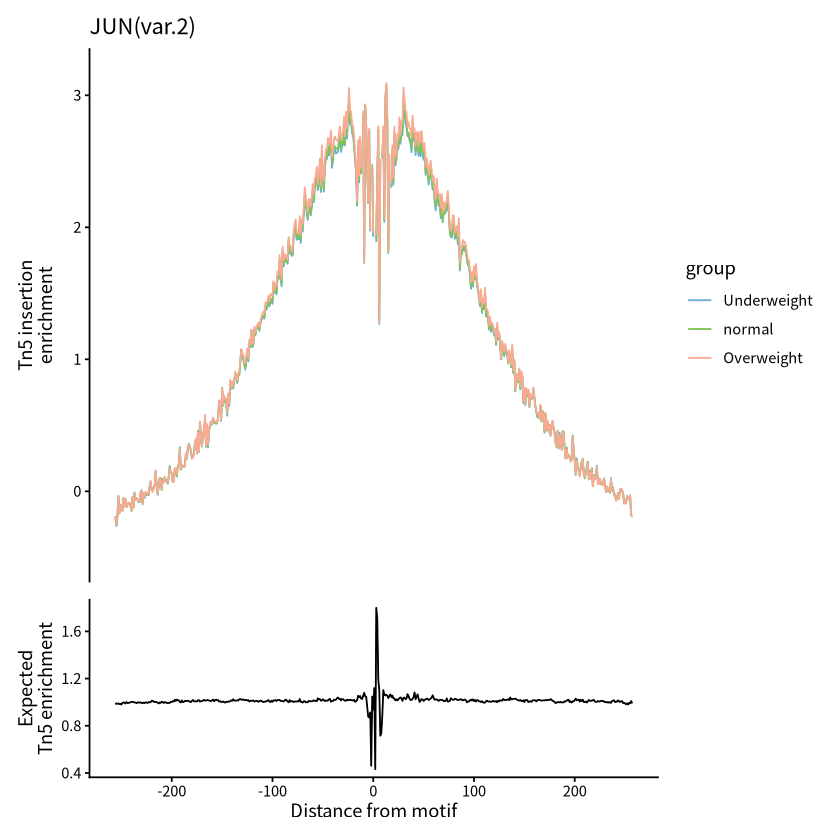

In [19]:
p2+ patchwork::plot_layout(ncol = 1)

In [21]:
# 先将组合图赋值给一个变量
p_final <- p2 + patchwork::plot_layout(ncol = 1)

# 使用 ggsave 保存
ggsave(
  filename = "./motif/RORC_Ov_Un_MAIT_SLC4A10plot2.pdf",    # 支持 .pdf, .png, .jpg, .tiff, .svg 等
  plot = p_final,
  width = 7,                   # 宽度（英寸）
  height = 9                   # 仅对位图有效（如 png）
)

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
